In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display

# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(2, P_sys, [benzene_antoine, toluene_antoine])

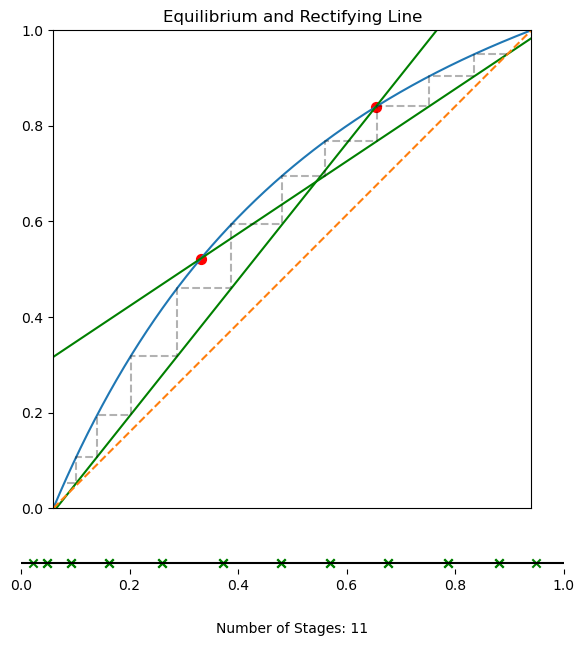

In [2]:
def plot_distil_rectifying_ex1(xD, xB, xF, R):
    distillation_model = DistillationModel(vle_model, xF = xF, xD = xD, xB =xB, reflux = R)
    fig, axs = plt.subplots(2, 1,figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    ax2 = axs[0]; ax2_fixed = axs[1]
    ax2 = distillation_model.plot_distil_rect(ax2 = ax2, ax2_fixed=ax2_fixed)
    print(distillation_model.xB, distillation_model.xF, distillation_model.xD)
    plt.subplots_adjust(hspace=0)
    
    distillation_model.plot_distil_binary(ax=ax2, ax_fixed=ax2_fixed)

    
    


plot_distil_rectifying_ex1(xD = np.array([0.95,0.05]), xF = np.array([0.55,0.45]), xB = np.array([0.03,0.97]), R = 2)
